In [128]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
f = open('glove.6B.300d.txt', encoding='utf-8')

In [131]:
embedding_subset = {}
subset_size = 40
i = 0
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype='float')
    embedding_subset[word] = coefs
    i += 1
    if i >= subset_size:
      break

In [132]:
subset_list = []
items = embedding_subset.items()
for key, value in items:
    subset_list.append(list(value))

In [133]:
pca = PCA(n_components=2)
res = pca.fit_transform(subset_list)

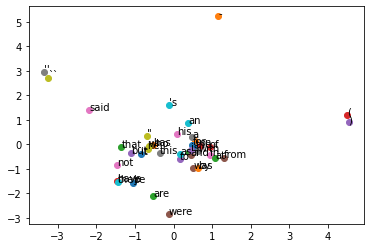

In [134]:
fig, ax = plt.subplots()
keys = list(embedding_subset.keys())
for index in range(subset_size):
    ax.scatter(res[index][0], res[index][1])
    ax.annotate(keys[index], (res[index][0], res[index][1]))
plt.show()